# Random Forest Classification

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a>

In [3]:
#RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier

#Train Test Split
from sklearn.model_selection import train_test_split

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Load the Dataset

<b>Dataset:</b> <i>SMOTE-Thursday-15-02-2018_TrafficForML_CICFlowMeter</i>

In [4]:
#provide the path of the dataset
df_train = pd.read_pickle('./Datasets/SMOTE-Thursday-15-02-2018_TrafficForML_CICFlowMeter.pkl')
df_test = pd.read_pickle('./Datasets/Processed-Thursday-15-02-2018_TrafficForML_CICFlowMeter.pkl')
#df = pd.read_pickle("./Datasets/Processed-Thursday-01-03-2018_TrafficForML_CICFlowMeter.pkl")


In [5]:
#View the dataset
df_train.head(5)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,17,394,1,1,43,59,43,43,43.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
1,0,0,118397,2,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,0
2,3389,6,2073949,8,7,1144,1581,677,0,143.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,443,6,501421,9,7,1552,4796,726,0,172.444444,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,53,17,37497,1,1,44,125,44,44,44.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0


In [6]:
df_test.head(5)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,0
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,0
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,0
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,0


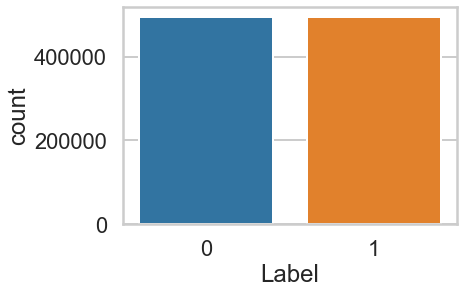

In [7]:
#Check Class Distribution
sns.countplot(df_train["Label"])

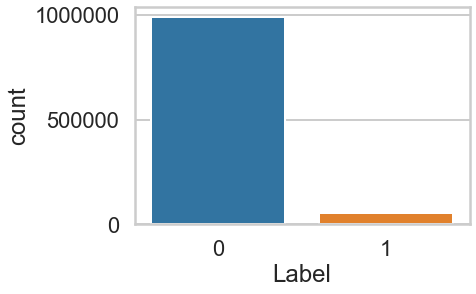

In [8]:
#Check Class Distribution
sns.countplot(df_test["Label"])

## Separate Target & Predictor variables for Test Set

In [9]:
# class is the target column
X_test = df_test.drop(columns=['Label'], axis = 1)
y_test = df_test.Label

In [10]:
# class is the target column
X_train = df_train.drop(columns=['Label'], axis = 1)
y_train = df_train.Label

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((988050, 78), (1040548, 78), (988050,), (1040548,))

## Build the Model

In [12]:
#Instantiate the Algorithm, see documentation to check for available parameters
rf = RandomForestClassifier(criterion="gini", 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_depth=12, 
                            n_estimators=15, 
                            random_state=35)

#Fit to the train dataset
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=15, random_state=35)

## Validate the Model

In [13]:
#Get predictions 
predict_test = rf.predict(X_test)

In [14]:
#Confusion Matrix
# Krish - after building the model, can get the classes, and use it to build the confusion matrix

#Get Classes 
labels = rf.classes_

#Get Confusion Matrix, add the classes as the labels
cm = confusion_matrix(y_test, predict_test, labels=labels)

#Put in DataFrame for easy viewing
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

cm_df

,0,1
0,988017,33
1,12,52486


In [15]:
#Accuracy
accuracy = accuracy_score(y_test, predict_test)

print("Accuracy Score: %.2f" % (accuracy * 100))

Accuracy Score: 100.00


In [16]:
#Classification Report
class_report = classification_report(y_test, predict_test, labels=labels)

print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    988050
           1       1.00      1.00      1.00     52498

    accuracy                           1.00   1040548
   macro avg       1.00      1.00      1.00   1040548
weighted avg       1.00      1.00      1.00   1040548



In [22]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

p = precision_score(y_test, predict_test)
r = recall_score(y_test, predict_test)
f1 = f1_score(y_test, predict_test)
f2 = fbeta_score(y_test, predict_test, beta=2.0)
print('Result: p=%.3f, r=%.3f, f1=%.3f, f2=%.3f' % (p, r, f1, f2))

Result: p=0.999, r=1.000, f1=1.000, f2=1.000


In [23]:
#View Actual Results

#Copy the dataset to preserve the original class of the test dataset
df_predicted_set = df_test.copy()

#Add the predictions
df_predicted_set["class_predicted"] = predict_test

In [24]:
df_predicted_set.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,class_predicted
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,0,0
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,0,0
2,47514,6,543,2,0,64,0,64,0,32.000000,...,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,0,0
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,0,0


## Get Feature Importance

In [25]:
#Access the feature importance attribute from the RandomForest algorithm
rf_feat_imp = rf.feature_importances_

#Put in DataFrame for easy viewing
feature_importance = pd.DataFrame(rf_feat_imp, index=X_train.columns, columns=["Feat_Imp"])

In [26]:
#Sort in descending order to get Most Important to Least Important
feature_importance.sort_values("Feat_Imp",ascending=False).head(10)

,Feat_Imp
Fwd Seg Size Min,0.118982
Fwd Pkts/s,0.107923
Init Fwd Win Byts,0.100180
Fwd Header Len,0.083179
Dst Port,0.053762
Flow Duration,0.049425
Fwd IAT Mean,0.042563
Flow IAT Mean,0.041077
Init Bwd Win Byts,0.032122
Fwd IAT Tot,0.028918


	Feat_Imp
* Fwd Seg Size Min	0.118982
* Fwd Pkts/s	0.107923
* Init Fwd Win Byts	0.100180
* Fwd Header Len	0.083179
* Dst Port	0.053762
* Flow Duration	0.049425
* Fwd IAT Mean	0.042563
* Flow IAT Mean	0.041077
* Init Bwd Win Byts	0.032122
* Fwd IAT Tot	0.028918
